In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [12]:
DATADIR = "F:\kagglecatsanddogs_3367a\PetImages"
CATEGORIES = ["Dog", "Cat"]

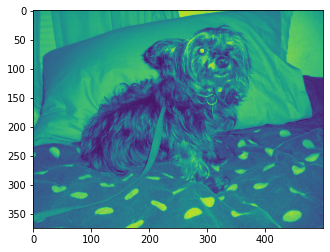

In [13]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
#         plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [14]:
print(img_array.shape)

(375, 500)


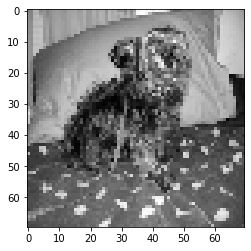

In [15]:
IMG_SIZE = 70

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
# plt.imshow(new_array)
plt.imshow(new_array, cmap='gray')
plt.show()

In [18]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#                 img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#                 new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

24946


In [35]:
# print(training_data[:10])
print(len(training_data))
print(training_data[0][0].shape)

24946
(70, 70, 3)


In [36]:
import random

random.shuffle(training_data)

In [37]:
for sample in training_data[:10]:
#     print(sample)
    print(sample[1])

1
0
0
0
0
0
1
1
1
1


In [38]:
X = []
y = []

In [39]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [40]:
import pickle

pickle_out = open("X.color.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.color.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [41]:
pickle_in = open("X.color.pickle", "rb")
X = pickle.load(pickle_in)
X.shape

(24946, 70, 70, 3)